In [1]:
__author__ = 'Yumi Choi <yumi.choi@noirlab.edu>'
__version__ = '20231127' 
__datasets__ = ['phat_v2']  
__keywords__ = ['M31', 'stars', 'interactive plot', 'plot:cmd', 'plot:sed']

# Exploring Resolved Stellar Populations in M31 with PHAT

*Yumi Choi & the Astro Data Lab Team*

### Table of contents
* [Goals & Summary](#goals)
* [Disclaimer & attribution](#attribution)
* [Imports & setup](#import)
* [Authentication](#auth)
* [Explore the main PHAT object table](#exploreTable)
* [Resources and references](#resources)

<a class="anchor" id="goals"></a>
# Goals
* Learn how to use an SQL query to make Healpix maps of PHAT brick number as well as young and old stellar populations 
* Learn how to retrieve data for each brick and plot color-magnitude diagrams and broad-band spectral energy distribution for individual stars
* Explore how stellar populations and photometry quality vary across the M31 disk

# Summary
Our own galaxy, the Milky Way (MW), provides detailed views of astrophysical processes, anchoring much of our understanding about galaxy formation and evolution. However, because we are observing the MW while residing in it, our observations suffer from complications arising from line-of-sight reddening, uncertain distances, and background/ foreground confusion. Studying external galaxies, which are free of these projection effects, instead offers a much cleaner view of an entire galaxy. The closest massive galaxy to MW, the Andromeda galaxy (also known as M31) provides a superb laboratory, as its proximity still allows us to resolve its individual stars but is far enough away to observe the entire galaxy.

and it contains a wide range of local enviornments consisting of young and old stellar populations. It also has various structures including spiral arms, star-forming rings, bar, and bulge. 

The Panchromatic Hubble Andromeda Treasury (PHAT; PI Dalcanton) was a Hubble Space Telescope Multi-cycle program to map roughly a third of M31's star forming disk, using 6 filters covering from the ultraviolet through the near infrared. 


<a class="anchor" id="attribution"></a>
# Disclaimer & attribution
If you use this notebook for your published science, please acknowledge the following:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, http://dx.doi.org/10.1117/12.2057445

* Data Lab disclaimer: https://datalab.noirlab.edu/disclaimers.php

* PHAT Reduction paper: Williams et al., "Reducing and Analyzing the PHAT Survey with the Cloud", ApJS, 2018, 236, 4: https://ui.adsabs.harvard.edu/abs/2018ApJS..236....4W

<a class="anchor" id="import"></a>
# Imports and setup

In [3]:
# std lib
from getpass import getpass

# 3rd party # remove imports that are not needed
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import random

# Data Lab
from dl import authClient as ac, queryClient as qc, storeClient as sc
from dl.helpers.utils import convert

<a class="anchor" id="auth"></a>
# Authentication
Much of the functionality of Data Lab can be accessed without explicitly logging in (the service then uses an anonymous login). But some capacities, for instance saving the results of your queries to your virtual storage space, require a login (i.e. you will need a registered user account).

If you need to log in to Data Lab, un-comment the cell below and execute it:

In [5]:
#token = ac.login(input("Enter user name: (+ENTER) "),getpass("Enter password: (+ENTER) "))
#ac.whoAmI()

<a class="anchor" id="exploreTable"></a>
# Explore the main PHAT object table
The notebook `M31withPhat.ipynb` listed available tables in the PHAT databse. This notebook will use the main PHAT object table, phat_v2.phot_mod, which contains combined average photometry.

### Examine the columns of the phat_v2.phot_mod table

First, query 10 rows from phat_v2.phot_mod just to get some basic information about the table.

In [53]:
query = """SELECT *
           FROM phat_v2.phot_mod
           LIMIT 10
        """

In [54]:
try:
    result = qc.query(sql=query) # by default the result is a CSV formatted string
except Exception as e:
    print(e.message)

Convert the result, which is by default a CSV formatted string, to a Pandas dataframe.

In [55]:
df = convert(result,'pandas')
print("Number of columns:",len(df.columns))
print("List of columns:", df.columns)
df

Number of columns: 88
List of columns: Index(['ra', 'dec', 'htm9', 'pix256', 'pix4096', 'random_id', 'x', 'y', 'ir_x',
       'ir_y', 'f110w_rate', 'f110w_raterr', 'f110w_vega', 'f110w_err',
       'f110w_chi', 'f110w_snr', 'f110w_sharp', 'f110w_round', 'f110w_crowd',
       'f160w_rate', 'f160w_raterr', 'f160w_vega', 'f160w_err', 'f160w_chi',
       'f160w_snr', 'f160w_sharp', 'f160w_round', 'f160w_crowd', 'f275w_rate',
       'f275w_raterr', 'f275w_vega', 'f275w_err', 'f275w_chi', 'f275w_snr',
       'f275w_sharp', 'f275w_round', 'f275w_crowd', 'f336w_rate',
       'f336w_raterr', 'f336w_vega', 'f336w_err', 'f336w_chi', 'f336w_snr',
       'f336w_sharp', 'f336w_round', 'f336w_crowd', 'f475w_rate',
       'f475w_raterr', 'f475w_vega', 'f475w_err', 'f475w_chi', 'f475w_snr',
       'f475w_sharp', 'f475w_round', 'f475w_crowd', 'f814w_rate',
       'f814w_raterr', 'f814w_vega', 'f814w_err', 'f814w_chi', 'f814w_snr',
       'f814w_sharp', 'f814w_round', 'f814w_crowd', 'f814w_f475w',
      

,ra,dec,htm9,pix256,pix4096,random_id,x,y,ir_x,ir_y,...,f814w_gst,f110w_gst,f160w_gst,inside_ir,inside_brick,inside_chipgap,inside_other_chipgap,field,brick,objid
0,10.589976,41.239578,4130451,133662,11096175,96.477520,1343.57,825.21,14.723693,332.60180,...,1,1,1,1,1,0,0,18,1,PHAT_10.5899756+41.239578
1,10.590045,41.239541,4130451,133662,11096175,29.114908,1339.73,827.77,14.379049,334.47064,...,1,0,0,1,1,0,0,18,1,PHAT_10.5900453+41.239541
2,10.590913,41.239257,4130451,133662,11096175,62.438095,1303.71,864.22,14.370677,355.64526,...,1,1,1,1,1,0,0,18,1,PHAT_10.5909126+41.239257
3,10.590441,41.239428,4130451,133662,11096175,68.947260,1324.39,844.83,14.774013,343.93866,...,1,1,1,1,1,0,0,18,1,PHAT_10.5904411+41.239428
4,10.590257,41.239471,4130451,133662,11096175,77.622116,1330.92,836.65,14.367790,339.63947,...,1,1,1,1,1,0,0,18,1,PHAT_10.5902568+41.239471
5,10.590228,41.239511,4130451,133662,11096175,69.116430,1334.15,836.21,15.102029,338.56946,...,1,1,1,1,1,0,0,18,1,PHAT_10.5902278+41.239511
6,10.590301,41.239488,4130451,133662,11096175,1.119472,1331.18,839.29,15.120645,340.33716,...,1,0,0,1,1,0,0,18,1,PHAT_10.5903006+41.239488
7,10.590101,41.239528,4130451,133662,11096175,46.867428,1337.79,830.23,14.507331,335.75674,...,1,1,1,1,1,0,0,18,1,PHAT_10.5901006+41.239528
8,10.590128,41.239560,4130451,133662,11096175,77.809525,1339.38,832.43,15.495424,335.93823,...,1,1,0,1,1,0,0,18,1,PHAT_10.5901279+41.239560
9,10.590395,41.239444,4130451,133662,11096175,51.215640,1326.41,842.93,14.811839,342.79352,...,1,1,1,1,1,0,0,18,1,PHAT_10.5903950+41.239444


<a class="anchor" id="chapter1"></a>
# Make Healpix maps of the brick number, MS and RGB stars

PHAT tiled the survey area with 23 bricks. Each brick consists of a 3$\times$6 mosaic of 18 HST pointings (<a href="http://adsabs.harvard.edu/abs/2012ApJS..200...18D">Dalcanton et al., 2012</a>).

One of the columns in the PHAT object table, pix4096, is the Healpix index (NSIDE=4096, nested scheme) for the objects's RA and Dec. Healpix is a handy tesselation of the sky into tiles of equal area. To make maps of aggregate quantities in PHAT, we're going to use the database to return results in a query grouped by Healpix index value.  We can then put the results into arrays, and use `healpy`'s functionality to display the maps.

In this first query, the GROUP BY clause tells the database to aggregate the results by the values in the pix4096 column, and return the average RA and Dec of objects in those groups, as well as the pix4096 value itself and the count of the number of objects in the group. Here we only retrieve blue and relatively bright main seqeunce (MS) stars with good photometric quality. 

In [24]:
query = """SELECT avg(ra) as ra0, avg(dec) as dec0, pix4096, count(pix4096) as nb, 
            avg(brick) as brick
           FROM phat_v2.phot_mod
           WHERE f475w_gst=1 AND f814w_gst=1 AND 
            f475w_vega-f814w_vega>-0.5 AND f475w_vega-f814w_vega<0.25 AND f814w_vega<24
           GROUP BY pix4096
          """

In [25]:
try:
    result = qc.query(sql=query) # by default the result is a CSV formatted string
except Exception as e:
    print(e.message)

Convert the result of MS stars to a Pandas dataframe.

In [26]:
df_MS = convert(result,'pandas')
print("Number of rows:", len(df_MS))

Number of rows: 2511


Compute the center of the RA and Dec distribution of the objects

In [31]:
rarot, decrot = np.median(df_MS['ra0']), np.median(df_MS['dec0'])

### Healpix map of the PHAT brick number

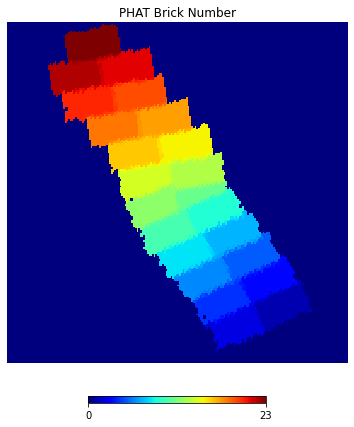

In [36]:
brickmap = np.zeros(hp.nside2npix(4096))
brickmap[df_MS['pix4096']] = df_MS['brick']
hp.gnomview(brickmap, title='PHAT Brick Number', reso=0.4, nest=True, rot=(rarot,decrot,0), notext=True, cmap='jet', min=0, max=23)

### Healpix map of MS stars

Young MS stars are clearly clustered around the spiral arms and the 10 kpc ring where active recent star formation takes place. 

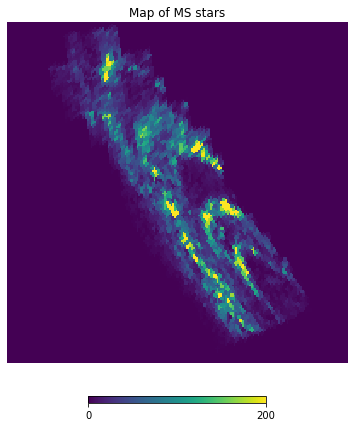

In [38]:
msmap = np.zeros(hp.nside2npix(4096))
msmap[df_MS['pix4096']] = df_MS['nb']
hp.gnomview(msmap, title='Map of MS stars', notext=True, reso=0.4, nest=True, 
            rot=(rarot,decrot,0), norm="%LogNorm", max=200)

The same query as above, but for red-giant branch (RGB) stars with good photometry quality.

In [39]:
query = """SELECT pix4096, count(pix4096) as nb
           FROM phat_v2.phot_mod
           WHERE f110w_gst=1 AND f160w_gst=1 AND 
            f110w_vega-f160w_vega>0.75 AND f110w_vega-f160w_vega<2.0 AND 
            f160w_vega>18.5 AND f160w_vega<22.0
           GROUP BY pix4096
          """

In [40]:
try:
    result = qc.query(sql=query) # by default the result is a CSV formatted string
except Exception as e:
    print(e.message)

Convert the result to a Pandas dataframe.

In [41]:
df_RGB = convert(result,'pandas')
print("Number of rows:", len(df_RGB))

Number of rows: 2571


### Healpix map of RGB stars

Contrary to MS stars, old RGB stars show a smoother spatial distribution, following th exponential disk and a bulge density profiles. 

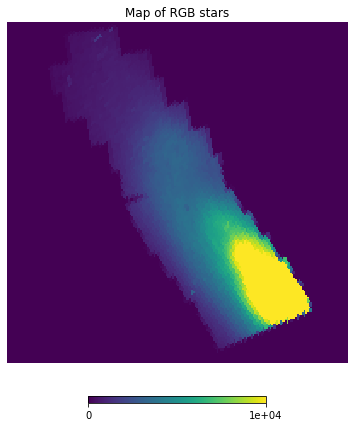

In [43]:
rgbmap = np.zeros(hp.nside2npix(4096))
rgbmap[df_RGB['pix4096']] = df_RGB['nb']
hp.gnomview(rgbmap, title='Map of RGB stars', notext=True, reso=0.4, nest=True, 
            rot=(rarot,decrot,0), norm="%LogNorm", max=1e4)

# Variation in stellar populations and photometric quality across the M31's disk

As seen in the maps of MS and RGB stars above, the spatial distribution of stellar populations as well as the stellar number density vary with their position within the galaxy disk. The number density of RGB stars, which are dominant by number, increases towards the center of M31. This stellar "crowding" becomes the dominant source of error in the HST photometry. The rest of the notebook will explore how stellar populations and photometric quality change with position within the disk by looking at multiple color-manigude diagrams (CMDs) in representative environments (Bricks 1, 15, and 23). We will also plot stellar broad-band spectral energy distributions (SEDs) for randomly selected stars in each environment. 

## Do query for Brick 1 (most crowded centeral region)

In [44]:
query = """SELECT f275w_vega, f336w_vega, f475w_vega, f814w_vega, f110w_vega, f160w_vega, 
            f275w_rate, f336w_rate, f475w_rate, f814w_rate, f110w_rate, f160w_rate
           FROM phat_v2.phot_mod
           WHERE ((f275w_gst=1 AND f336w_gst=1) AND 
                  (f475w_gst=1 AND f814w_gst=1) AND 
                  (f110w_gst=1 AND f160w_gst=1)) AND
                  brick=1
          """

In [45]:
try:
    result = qc.query(sql=query) # by default the result is a CSV formatted string
except Exception as e:
    print(e.message)

In [46]:
df_b1 = convert(result,'pandas')
print("Number of rows:", len(df_b1))

Number of rows: 1141400


### Make UV, optical, and IR CMDs for Brick 1

Text(0.5, 1.0, 'IR CMD')

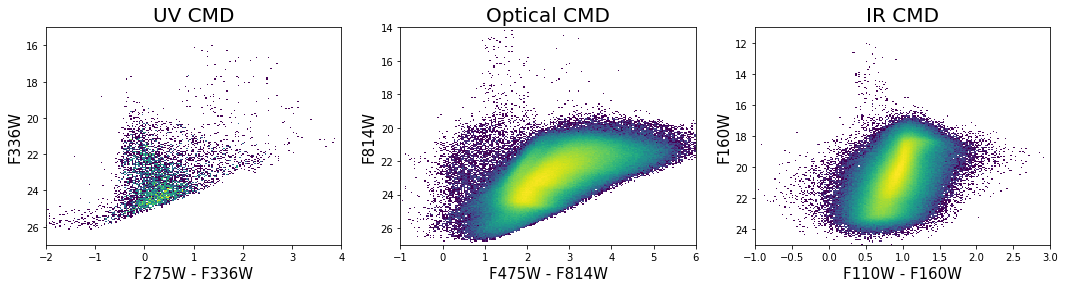

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,4))

huv = ax1.hist2d(df_b1['f275w_vega']-df_b1['f336w_vega'],
                 df_b1['f336w_vega'], 
                 bins=200, range=((-2,4),(15,27)), 
                 norm=plt.matplotlib.colors.LogNorm())
ax1.set_xlabel('F275W - F336W',fontsize=15)
ax1.set_ylabel('F336W',fontsize=15)
ax1.set_xlim(huv[1].min(),huv[1].max())
ax1.set_ylim(huv[2].max(),huv[2].min())
ax1.set_title('UV CMD',fontsize=20)

hopt = ax2.hist2d(df_b1['f475w_vega']-df_b1['f814w_vega'], 
                  df_b1['f814w_vega'], 
                  bins=200, range=((-1,6),(14,27)), 
                  norm=plt.matplotlib.colors.LogNorm())
ax2.set_xlabel('F475W - F814W',fontsize=15)
ax2.set_ylabel('F814W',fontsize=15)
ax2.set_xlim(hopt[1].min(),hopt[1].max())
ax2.set_ylim(hopt[2].max(),hopt[2].min())
ax2.set_title('Optical CMD',fontsize=20)

hir = ax3.hist2d(df_b1['f110w_vega']-df_b1['f160w_vega'], 
                 df_b1['f160w_vega'], 
                 bins=200, range=((-1,3),(11,25)),
                 norm=plt.matplotlib.colors.LogNorm())
ax3.set_xlabel('F110W - F160W',fontsize=15)
ax3.set_ylabel('F160W',fontsize=15)
ax3.set_xlim(hir[1].min(),hir[1].max())
ax3.set_ylim(hir[2].max(),hir[2].min())
ax3.set_title('IR CMD',fontsize=20)

### Plot a broad-band spectral energy distribution of a star in Brick 1

Select stars that have good photometry in all 6 bands.

In [49]:
stars_6b, = np.where((df_b1['f275w_vega'] < 30) & (df_b1['f336w_vega'] < 30) &
                     (df_b1['f475w_vega'] < 30) & (df_b1['f814w_vega'] < 30) & 
                     (df_b1['f110w_vega'] < 30) & (df_b1['f160w_vega'] < 30))
print('There are %d stars with good measurements in all 6 bands!' % (len(stars_6b))) 

There are 4909 stars with good measurements in all 6 bands!


In [51]:
# Pivot wavelength in nm for each filter (F275W, F336W, F475W, F814W, F110W, F160W)
plambda = [270.97, 335.45, 474.44, 805.98, 1153.4, 1536.9]

Text(0, 0.5, 'F160W')

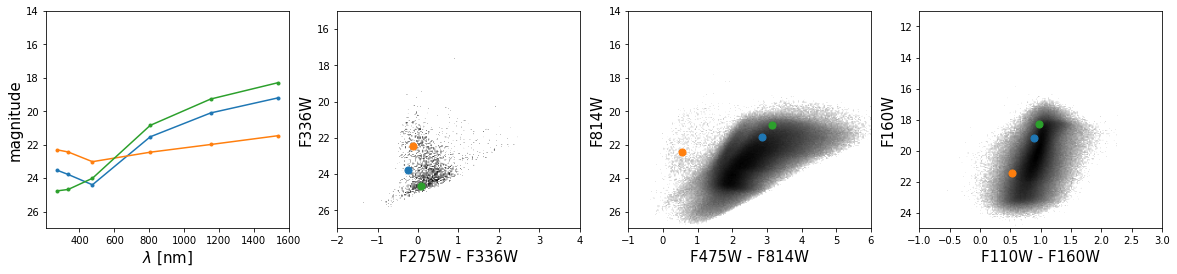

In [61]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,4))

sIDs = random.choices(stars_6b, k=3)
for i in sIDs:
    ax1.plot(plambda, [df_b1['f275w_vega'][i], df_b1['f336w_vega'][i], 
                       df_b1['f475w_vega'][i], df_b1['f814w_vega'][i],
                       df_b1['f110w_vega'][i], df_b1['f160w_vega'][i]], '.-')
    ax2.scatter(df_b1['f275w_vega'][i]-df_b1['f336w_vega'][i], df_b1['f336w_vega'][i], s=50)
    ax3.scatter(df_b1['f475w_vega'][i]-df_b1['f814w_vega'][i], df_b1['f814w_vega'][i], s=50)
    ax4.scatter(df_b1['f110w_vega'][i]-df_b1['f160w_vega'][i], df_b1['f160w_vega'][i], s=50)
ax1.set_ylim(27,14)
ax1.set_xlabel(r'$\lambda$ [nm]',fontsize=15)
ax1.set_ylabel('magnitude',fontsize=15)

ax2.imshow(huv[0].T, origin='lower', cmap=plt.cm.gray_r, 
           norm=plt.matplotlib.colors.LogNorm(),
           extent=[-2,4,15,27], aspect='auto')
ax2.set_ylim(huv[2].max(),huv[2].min())
ax2.set_xlabel('F275W - F336W',fontsize=15)
ax2.set_ylabel('F336W',fontsize=15)

ax3.imshow(hopt[0].T, origin='lower', cmap=plt.cm.gray_r, 
           norm=plt.matplotlib.colors.LogNorm(),
           extent=[-1,6,14,27], aspect='auto')
ax3.set_ylim(hopt[2].max(),hopt[2].min())
ax3.set_xlabel('F475W - F814W',fontsize=15)
ax3.set_ylabel('F814W',fontsize=15)

ax4.imshow(hir[0].T, origin='lower', cmap=plt.cm.gray_r, 
           norm=plt.matplotlib.colors.LogNorm(),
           extent=[-1,3,11,25], aspect='auto')
ax4.set_ylim(hir[2].max(),hir[2].min())
ax4.set_xlabel('F110W - F160W',fontsize=15)
ax4.set_ylabel('F160W',fontsize=15)

# Do query for Brick 15 (10 kpc star-forming ring region)

In [62]:
query = """SELECT f275w_vega, f336w_vega, f475w_vega, f814w_vega, f110w_vega, f160w_vega, 
            f275w_rate, f336w_rate, f475w_rate, f814w_rate, f110w_rate, f160w_rate
           FROM phat_v2.phot_mod
           WHERE ((f275w_gst=1 AND f336w_gst=1) AND 
                  (f475w_gst=1 AND f814w_gst=1) AND 
                  (f110w_gst=1 AND f160w_gst=1)) AND
                  brick=15
          """

In [63]:
try:
    result = qc.query(sql=query) # by default the result is a CSV formatted string
except Exception as e:
    print(e.message)

In [64]:
df_b15 = convert(result,'pandas')
print("Number of rows:", len(df_b15))

Number of rows: 658617


### Make UV, optical, and IR CMDs for Brick 15

Text(0.5, 1.0, 'IR CMD')

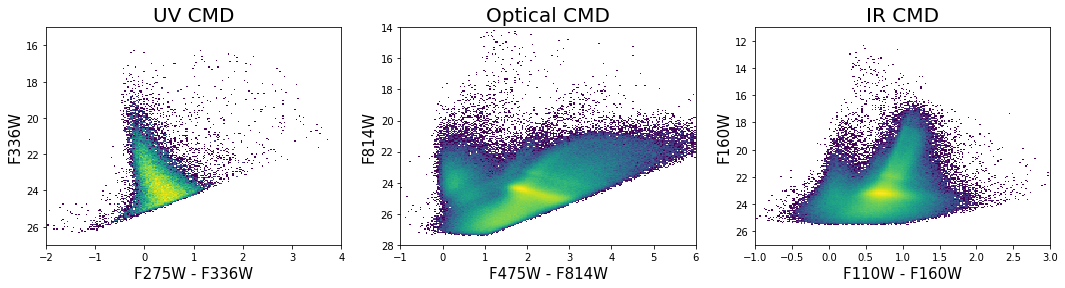

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,4))

huv = ax1.hist2d(df_b15['f275w_vega']-df_b15['f336w_vega'],
                 df_b15['f336w_vega'], 
                 bins=200, range=((-2,4),(15,27)), 
                 norm=plt.matplotlib.colors.LogNorm())
ax1.set_xlabel('F275W - F336W',fontsize=15)
ax1.set_ylabel('F336W',fontsize=15)
ax1.set_xlim(huv[1].min(),huv[1].max())
ax1.set_ylim(huv[2].max(),huv[2].min())
ax1.set_title('UV CMD',fontsize=20)

hopt = ax2.hist2d(df_b15['f475w_vega']-df_b15['f814w_vega'], 
                  df_b15['f814w_vega'], 
                  bins=200, range=((-1,6),(14,28)), 
                  norm=plt.matplotlib.colors.LogNorm())
ax2.set_xlabel('F475W - F814W',fontsize=15)
ax2.set_ylabel('F814W',fontsize=15)
ax2.set_xlim(hopt[1].min(),hopt[1].max())
ax2.set_ylim(hopt[2].max(),hopt[2].min())
ax2.set_title('Optical CMD',fontsize=20)

hir = ax3.hist2d(df_b15['f110w_vega']-df_b15['f160w_vega'], 
                 df_b15['f160w_vega'], 
                 bins=200, range=((-1,3),(11,27)),
                 norm=plt.matplotlib.colors.LogNorm())
ax3.set_xlabel('F110W - F160W',fontsize=15)
ax3.set_ylabel('F160W',fontsize=15)
ax3.set_xlim(hir[1].min(),hir[1].max())
ax3.set_ylim(hir[2].max(),hir[2].min())
ax3.set_title('IR CMD',fontsize=20)

In [66]:
stars_6b, = np.where((df_b15['f275w_vega'] < 30) & (df_b15['f336w_vega'] < 30) &
                     (df_b15['f475w_vega'] < 30) & (df_b15['f814w_vega'] < 30) & 
                     (df_b15['f110w_vega'] < 30) & (df_b15['f160w_vega'] < 30))
print('There are %d stars with detection in all 6 bands!' % (len(stars_6b))) 

There are 31723 stars with detection in all 6 bands!


Text(0, 0.5, 'F160W')

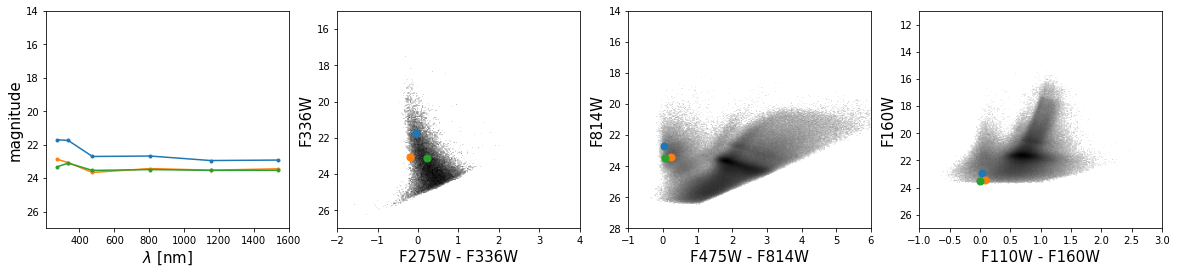

In [67]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,4))

sIDs = random.choices(stars_6b, k=3)
for i in sIDs:
    ax1.plot(plambda, [df_b15['f275w_vega'][i], df_b15['f336w_vega'][i], 
                       df_b15['f475w_vega'][i], df_b15['f814w_vega'][i],
                       df_b15['f110w_vega'][i], df_b15['f160w_vega'][i]], '.-')
    ax2.scatter(df_b15['f275w_vega'][i]-df_b15['f336w_vega'][i], df_b15['f336w_vega'][i], s=50)
    ax3.scatter(df_b15['f475w_vega'][i]-df_b15['f814w_vega'][i], df_b15['f814w_vega'][i], s=50)
    ax4.scatter(df_b15['f110w_vega'][i]-df_b15['f160w_vega'][i], df_b15['f160w_vega'][i], s=50)
ax1.set_ylim(27,14)
ax1.set_xlabel(r'$\lambda$ [nm]',fontsize=15)
ax1.set_ylabel('magnitude',fontsize=15)

ax2.imshow(huv[0].T, origin='lower', cmap=plt.cm.gray_r, 
           norm=plt.matplotlib.colors.LogNorm(),
           extent=[-2,4,15,27], aspect='auto')
ax2.set_ylim(huv[2].max(),huv[2].min())
ax2.set_xlabel('F275W - F336W',fontsize=15)
ax2.set_ylabel('F336W',fontsize=15)

ax3.imshow(hopt[0].T, origin='lower', cmap=plt.cm.gray_r, 
           norm=plt.matplotlib.colors.LogNorm(), 
           extent=[-1,6,14,27], aspect='auto')
ax3.set_ylim(hopt[2].max(),hopt[2].min())
ax3.set_xlabel('F475W - F814W',fontsize=15)
ax3.set_ylabel('F814W',fontsize=15)

ax4.imshow(hir[0].T, origin='lower', cmap=plt.cm.gray_r, 
           norm=plt.matplotlib.colors.LogNorm(),
           extent=[-1,3,11,25], aspect='auto')
ax4.set_ylim(hir[2].max(),hir[2].min())
ax4.set_xlabel('F110W - F160W',fontsize=15)
ax4.set_ylabel('F160W',fontsize=15)

# Do query for Brick 23 (outer low-density region)

In [68]:
query = """SELECT f275w_vega, f336w_vega, f475w_vega, f814w_vega, f110w_vega, f160w_vega, 
            f275w_rate, f336w_rate, f475w_rate, f814w_rate, f110w_rate, f160w_rate
           FROM phat_v2.phot_mod
           WHERE ((f275w_gst=1 AND f336w_gst=1) AND 
                  (f475w_gst=1 AND f814w_gst=1) AND 
                  (f110w_gst=1 AND f160w_gst=1)) AND
                  brick=23
          """

In [69]:
try:
    result = qc.query(sql=query) # by default the result is a CSV formatted string
except Exception as e:
    print(e.message)

In [70]:
df_b23 = convert(result,'pandas')
print("Number of rows:", len(df_b23))

Number of rows: 253181


### Make UV, optical, and IR CMDs for Brick 23

Text(0.5, 1.0, 'IR CMD')

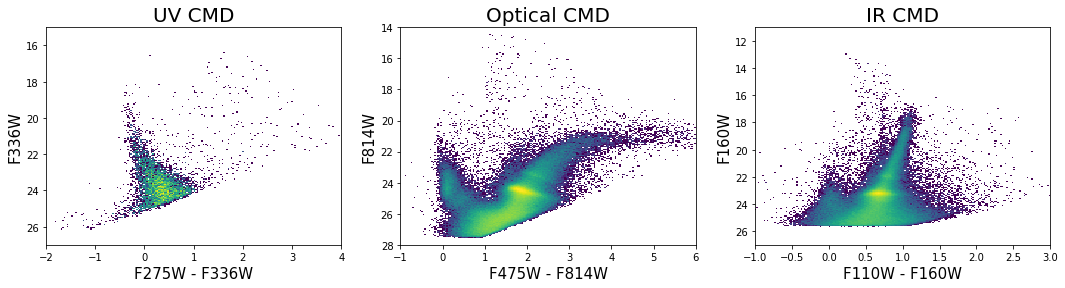

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,4))

huv = ax1.hist2d(df_b23['f275w_vega']-df_b23['f336w_vega'],
                 df_b23['f336w_vega'], 
                 bins=200, range=((-2,4),(15,27)), 
                 norm=plt.matplotlib.colors.LogNorm())
ax1.set_xlabel('F275W - F336W',fontsize=15)
ax1.set_ylabel('F336W',fontsize=15)
ax1.set_xlim(huv[1].min(),huv[1].max())
ax1.set_ylim(huv[2].max(),huv[2].min())
ax1.set_title('UV CMD',fontsize=20)

hopt = ax2.hist2d(df_b23['f475w_vega']-df_b23['f814w_vega'], 
                  df_b23['f814w_vega'], 
                  bins=200, range=((-1,6),(14,28)), 
                  norm=plt.matplotlib.colors.LogNorm())
ax2.set_xlabel('F475W - F814W',fontsize=15)
ax2.set_ylabel('F814W',fontsize=15)
ax2.set_xlim(hopt[1].min(),hopt[1].max())
ax2.set_ylim(hopt[2].max(),hopt[2].min())
ax2.set_title('Optical CMD',fontsize=20)

hir = ax3.hist2d(df_b23['f110w_vega']-df_b23['f160w_vega'], 
                 df_b23['f160w_vega'], 
                 bins=200, range=((-1,3),(11,27)),
                 norm=plt.matplotlib.colors.LogNorm())
ax3.set_xlabel('F110W - F160W',fontsize=15)
ax3.set_ylabel('F160W',fontsize=15)
ax3.set_xlim(hir[1].min(),hir[1].max())
ax3.set_ylim(hir[2].max(),hir[2].min())
ax3.set_title('IR CMD',fontsize=20)

In [72]:
stars_6b, = np.where((df_b23['f275w_vega'] < 30) & (df_b23['f336w_vega'] < 30) &
                     (df_b23['f475w_vega'] < 30) & (df_b23['f814w_vega'] < 30) & 
                     (df_b23['f110w_vega'] < 30) & (df_b23['f160w_vega'] < 30))
print('There are %d stars with detection in all 6 bands!' % (len(stars_6b))) 

There are 6281 stars with detection in all 6 bands!


Text(0, 0.5, 'F160W')

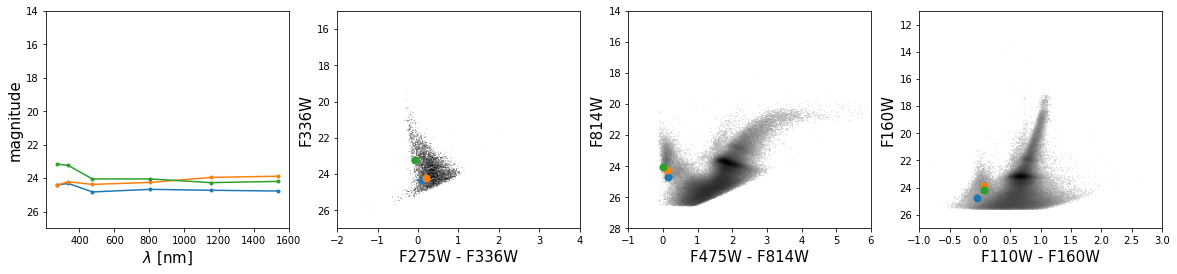

In [73]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,4))

sIDs = random.choices(stars_6b, k=3)
for i in sIDs:
    ax1.plot(plambda, [df_b23['f275w_vega'][i], df_b23['f336w_vega'][i], 
                       df_b23['f475w_vega'][i], df_b23['f814w_vega'][i],
                       df_b23['f110w_vega'][i], df_b23['f160w_vega'][i]], '.-')
    ax2.scatter(df_b23['f275w_vega'][i]-df_b23['f336w_vega'][i], df_b23['f336w_vega'][i], s=50)
    ax3.scatter(df_b23['f475w_vega'][i]-df_b23['f814w_vega'][i], df_b23['f814w_vega'][i], s=50)
    ax4.scatter(df_b23['f110w_vega'][i]-df_b23['f160w_vega'][i], df_b23['f160w_vega'][i], s=50)
ax1.set_ylim(27,14)
ax1.set_xlabel(r'$\lambda$ [nm]',fontsize=15)
ax1.set_ylabel('magnitude',fontsize=15)

ax2.imshow(huv[0].T, origin='lower', cmap=plt.cm.gray_r, 
           norm=plt.matplotlib.colors.LogNorm(), 
           extent=[-2,4,15,27], aspect='auto')
ax2.set_ylim(huv[2].max(),huv[2].min())
ax2.set_xlabel('F275W - F336W',fontsize=15)
ax2.set_ylabel('F336W',fontsize=15)

ax3.imshow(hopt[0].T, origin='lower', cmap=plt.cm.gray_r, 
           norm=plt.matplotlib.colors.LogNorm(), 
           extent=[-1,6,14,27], aspect='auto')
ax3.set_ylim(hopt[2].max(),hopt[2].min())
ax3.set_xlabel('F475W - F814W',fontsize=15)
ax3.set_ylabel('F814W',fontsize=15)

ax4.imshow(hir[0].T, origin='lower', cmap=plt.cm.gray_r, 
           norm=plt.matplotlib.colors.LogNorm(), 
           extent=[-1,3,11,27], aspect='auto')
ax4.set_ylim(hir[2].max(),hir[2].min())
ax4.set_xlabel('F110W - F160W',fontsize=15)
ax4.set_ylabel('F160W',fontsize=15)

<a class="anchor" id="resources"></a>
# Resources and references
Dalcanton, J.J. et al. (2012, ApJS, 200, 18), "The Panchromatic Hubble Andromeda Treasury"
http://adsabs.harvard.edu/abs/2012ApJS..200...18D

Williams, B.F. et al. (2023, arXiv:2307.09681), "The Panchromatic Hubble Andromeda Treasury XXI. The Legacy Resolved Stellar Photometry Catalog"
https://ui.adsabs.harvard.edu/abs/2023arXiv230709681W/abstract

In [2]:
import bokeh